<a href="https://colab.research.google.com/github/JonathanLehner/Colab-collection/blob/master/python_render_obj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python 3

In [14]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl" #opengl seems to only work with TPU
!PYOPENGL_PLATFORM=egl python -c "from OpenGL import EGL"
print(os.environ['PYOPENGL_PLATFORM']) 


egl


In [15]:
# https://github.com/eduble/gl
!apt install libgl1-mesa-dri libegl1-mesa libgbm1
!pip install wheel
!pip install numpy
!pip install Cython
!git clone https://github.com/mcfletch/pyopengl.git
%cd pyopengl
!python setup.py develop
%cd accelerate
!python setup.py develop
%cd /content/

!pip install transforms3d

!wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/hand_mesh.1.obj
!wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/hand_mesh.obj
!wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/hand_mesh.obj.mtl


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libegl1-mesa is already the newest version (18.2.8-0ubuntu0~18.04.2).
libgbm1 is already the newest version (18.2.8-0ubuntu0~18.04.2).
libgl1-mesa-dri is already the newest version (18.2.8-0ubuntu0~18.04.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
fatal: destination path 'pyopengl' already exists and is not an empty directory.
/content/pyopengl
running develop
running egg_info
writing PyOpenGL.egg-info/PKG-INFO
writing dependency_links to PyOpenGL.egg-info/dependency_links.txt
writing top-level names to PyOpenGL.egg-info/top_level.txt
reading manifest file 'PyOpenGL.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'PyOpenGL.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.6/site

In [16]:
import OpenGL.GL as gl
print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 


None
None


In [17]:
# Install pyrender
!pip install pyrender

In [18]:
# Load texture
from PIL import Image
import numpy as np
!wget -O texture_skin1.png https://i0.wp.com/3dtextures.me/wp-content/uploads/2016/05/material_218.png?zoom=2&resize=800%2C800&ssl=1
!wget -O texture_skin2.png https://i0.wp.com/3dtextures.me/wp-content/uploads/2019/01/material_692.png?zoom=2&resize=600%2C800&ssl=1
!wget -O texture.jpeg https://images.unsplash.com/photo-1552332271-fcd3c889767e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1336&q=80
texture_image = Image.open("texture.jpeg")
np_im = np.array(texture_image)


--2019-05-07 20:32:35--  https://i0.wp.com/3dtextures.me/wp-content/uploads/2016/05/material_218.png?zoom=2
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216736 (212K) [image/png]
Saving to: ‘texture_skin1.png’

texture_skin1.png   100%[===================>] 211.66K  --.-KB/s    in 0.04s   

2019-05-07 20:32:35 (4.75 MB/s) - ‘texture_skin1.png’ saved [216736/216736]

--2019-05-07 20:32:37--  https://i0.wp.com/3dtextures.me/wp-content/uploads/2019/01/material_692.png?zoom=2
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106452 (104K) [image/png]
Saving to: ‘texture_skin2.png’

texture_skin2.png   100%[===================>] 103.96K  --.-KB/s    in 0.03s   

2019-05-07 20:32:37 (3.22 MB/s) - ‘texture_skin2.png’ saved [106452/106452]

--2019-05-07 20:32

In [19]:
print(np_im)

[[[ 85 111 136]
  [ 63  85 109]
  [ 99 127 148]
  ...
  [130 161 182]
  [100 130 154]
  [127 157 185]]

 [[ 74  98 124]
  [ 83 109 132]
  [114 142 163]
  ...
  [113 155 171]
  [106 147 165]
  [107 148 168]]

 [[ 82 108 131]
  [ 98 130 151]
  [107 135 156]
  ...
  [109 153 164]
  [121 165 178]
  [ 97 139 155]]

 ...

 [[122 163 195]
  [137 178 210]
  [137 178 210]
  ...
  [ 81 125 150]
  [ 81 122 144]
  [ 88 125 152]]

 [[114 157 189]
  [115 156 188]
  [146 187 219]
  ...
  [ 92 137 160]
  [ 82 123 143]
  [ 92 128 154]]

 [[123 167 196]
  [128 169 199]
  [141 182 214]
  ...
  [ 84 122 141]
  [ 91 137 160]
  [ 82 117 139]]]


In [0]:
import pyrender
import os
import numpy as np
import trimesh
import pyrender
import transforms3d
import OpenGL.GL as gl


In [37]:
!pwd
%cd /content/
  
# Load the hand trimesh and put it in a scene
hand_trimesh = trimesh.load('hand_mesh.obj')
mesh = pyrender.Mesh.from_trimesh(hand_trimesh, smooth=True) #, material

/content
/content


In [38]:
scene = pyrender.Scene(bg_color=[0.8, 0.8, 1.0, 0.0])
scene.add(mesh, pose=np.eye(4))


In [39]:
print(my_material)


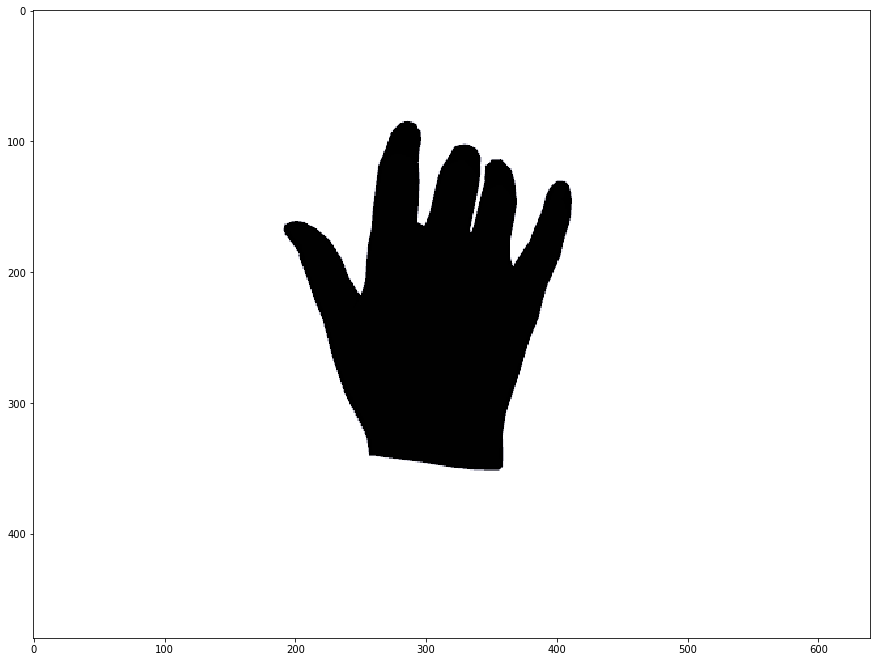

In [40]:
from matplotlib import pyplot as plt

# Set up the camera -- z-axis away from the scene, x-axis right, y-axis up
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
#camera = pyrender.OrthographicCamera(xmag=1.0, ymag=1.0)

# look at the hand from a certain distance
# rotate to view the hand from a different angle

rotation = transforms3d.euler.euler2mat(0, np.pi/2, np.pi/2, axes='sxyz') # in tutorial matrix it is np.pi/4, 0, np.pi/2,
#print(rotation)  # np.pi/2
# translations
T = [[1.0, 0.0, 0.0, 0.0],
     [0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 250.0],
     [0.0, 0.0, 0.0, 1.0]]
Z = [1.0, 1.0, 1.0] # zooms
B = transforms3d.affines.compose([45.0, 0.0, 0.0], rotation, Z) # applies translation last
camera_pose = np.matmul(B, T)
# print(camera_pose)
# print("test")

scene.add(camera, pose=camera_pose)

# Set up the light -- a single spot light in the same spot as the camera
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                               innerConeAngle=np.pi/16.0)
scene.add(light, pose=camera_pose)

# Render the scene
r = pyrender.OffscreenRenderer(640, 480)
flags = pyrender.RenderFlags.RGBA | pyrender.RenderFlags.OFFSCREEN
color, depth = r.render(scene, flags=flags)


plt.figure(figsize=(15,15))
plt.axis('on')
plt.imshow(color)

# print(color)

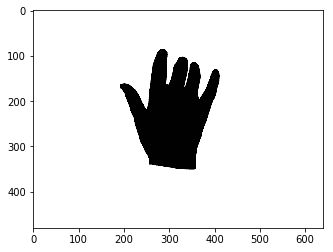

In [41]:
plt.imshow(color)


In [0]:
# download background images dataset
# !wget http://groups.csail.mit.edu/vision/datasets/ADE20K/ADE20K_2016_07_26.zip
# !unzip ADE20K_2016_07_26.zip

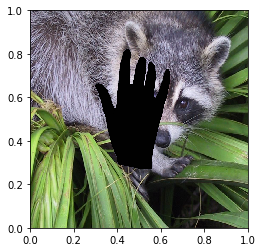

In [43]:
# show rendered hand in front of a random background image
# source: https://stackoverflow.com/questions/34495817/plotting-a-background-image-to-a-matplotlib-graph
from matplotlib import pyplot as plt
from scipy.misc import face
import numpy as np

fig, ax = plt.subplots(1, 1)

background = ax.imshow(face(), cmap=plt.cm.gray, extent=[0, 1, 0, 1])
image = ax.imshow(color, extent=[0, 1, 0, 1])

plt.show()